<img src="resources/ICESI.png">

# Visión artificial en restaurantes

Estudiantes Maestría en Inteligencia Artifical - ICESI

* _Erik Vergara_

* _Iván Felipe Morán_

* _Josué Cobaleda_

### 1. [Entendimiento del negocio](#business-understanding)

- 1.1 Declaración del problema
- 1.2 Objetivo SMART
- 1.3 Revisión de la literatura
- 1.4 Plan de trabajo

### 2. [Entendimiento de los Datos](#data-understanding)
- 2.1 Visión General de los Datos Disponibles
- 2.2 Análisis Exploratorio de Datos (EDA) 

### 3. [Modelado](#modelling)
Modelos utilizados (YOLOv11 y Transformer) y arquitectura general del pipeline 

Configuración experimental y recursos computacionales (Colab vs PC local)


### 4. [Evaluación](#evaluation)
- 4.1 Resultados obtenidos y Comparación de variantes
Me4odología de evaluación del conteo (MAE, sesgo, RMSE, exactitud con tolerancia)
Resultados obtenidos y comparación YOLOv11 vs Transformer
- 4.2 Interpretación desde negocio
- 4.3 Limitaciones y trabajos futuros

# <a id="business-understanding"></a>1. Entendimiento del Negocio

## 1.1 Declaración del problema

Alitas Factory es un restaurante de comida casual que cuenta con cámaras de videovigilancia en su zona de atención al cliente. Sin embargo, estas cámaras se utilizan únicamente con fines de seguridad y no como fuente de información para entender el comportamiento real de los clientes dentro del local.

Actualmente, la administración no dispone de datos objetivos sobre:

- cuántas personas visitan el restaurante en un periodo de tiempo determinado,

- cuánto tiempo permanecen en las mesas,

- qué mesas se usan más o menos,

- ni la composición básica de sus clientes (proporción de hombres vs. mujeres).

Sin esta información, decisiones clave como la asignación de turnos de meseros, la distribución de mesas, el diseño de promociones y la evaluación de campañas comerciales se toman principalmente por intuición. El problema de negocio es, por tanto, no estar aprovechando la información contenida en los videos del restaurante para tomar decisiones basadas en datos sobre ocupación, comportamiento y perfil de los clientes.

## 1.2 Objetivo SMART

Objetivo general (en versión SMART):

Desarrollar un prototipo que, usando modelos de visión artificial pre-entrenados (YOLO11 y un modelo tipo Transformer), estime una base para la analitica de personas presentes en el restaurante a partir de video, y evaluar su precisión comparando el conteo automático vs ground truth

**Objetivo desglosado:**

Específico: detección + tracking de personas, clasificación de género, cálculo de métricas de ocupación/permanencia por mesa.

Medible: precisión ≥ 80 % en detección y ≥ 80 % en clasificación de género sobre una muestra validada manualmente; generación de indicadores cuantitativos (conteos, tiempos, proporciones).

Alcanzable: uso de modelos preentrenados (YOLO, clasificadores de género) y una cantidad de video 

Relevante: aporta información accionable para operación (turnos, distribución de mesas) y marketing (conocimiento de perfil de clientes).

Temporal: desarrollado dentro del periodo académico de la materia de Innovación/IA, con entrega al final del curso.

## 1.3 Revisión de la literatura

La literatura y las experiencias industriales en retail y restauración muestran que la analítica de video y la visión artificial son herramientas consolidadas para entender el comportamiento de los clientes en espacios físicos:

- **Detección y seguimiento de personas (people counting & tracking)**: Sistemas de analítica de video permiten detectar y seguir a las personas en tiempo real dentro de tiendas y restaurantes. A partir de esto se estiman métricas como: conteo de visitantes y nivel de ocupación, rutas de recorrido y “zonas calientes” mediante mapas de calor, tiempos de permanencia (dwell time) en el local o en zonas específicas, detección de filas y tiempos de espera en cajas o mostradores. Estudios en retail reportan que aumentos modestos en el tiempo de permanencia (por ejemplo, +1 %) pueden asociarse con incrementos proporcionales en ventas (~1,3 %), lo que respalda el valor de medir y gestionar el comportamiento dentro del punto de venta.

- **Decisiones comerciales basadas en analítica de video**: Los datos de conteo, rutas y tiempos de permanencia se utilizan para: optimizar el diseño del local (reubicación de mesas, exhibidores, pasillos para evitar cuellos de botella y maximizar exposición a productos), alinear turnos y cantidad de personal con las horas pico de afluencia, reduciendo costos en horas valle y evitando falta de servicio en momentos de alta demanda, evaluar promociones y campañas observando cambios en tráfico y comportamiento durante periodos promocionales (ej. “2x1 en cierto día”) y calculando su impacto en visitas y ventas, incorporar estos datos en rutinas de gestión (reuniones semanales con mapas de calor y curvas de ocupación) como parte de un ciclo de mejora continua.

- **Clasificación demográfica (género y edad)**: La visión artificial también se emplea para estimar, de forma anónima, género y rango de edad de los visitantes. Esto se usa para:
caracterizar el público real (por ejemplo, proporción de hombres/mujeres, familias con niños, jóvenes/adultos mayores), ajustar la oferta, ambientación y promociones a los segmentos dominantes en cada franja horaria, personalizar contenidos en pantallas digitales dentro del local (publicidad o menús dinámicos según la audiencia presente). Modelos de deep learning preentrenados (redes convolucionales, Vision Transformers) se han propuesto tanto para clasificación basada en rostro como en cuerpo completo, con resultados robustos en conjuntos de datos públicos.

- **Integración con otras fuentes de datos**: La literatura destaca que la analítica de video se potencia al combinarla con: datos de ventas (POS) para calcular tasas de conversión y ticket promedio por visitante, datos de reservas/pedidos para analizar no-shows y tamaños de grupo, variables externas como clima y eventos locales para explicar variaciones en afluencia, datos de marketing (campañas digitales, redes sociales) para atribuir cambios en tráfico a acciones de comunicación específicas. Esta visión integrada permite predecir demanda, optimizar inventario, ajustar promociones y, en general, tomar decisiones más informadas.

En conjunto, la literatura respalda el uso de visión artificial como fuente central de “inteligencia de cliente” en espacios físicos, con beneficios documentados en incremento de ventas, optimización de recursos, mejora de la experiencia del cliente y ventaja competitiva.

## 1.4 Plan de trabajo: tareas y cronograma

Proponemos el siguiente plan de trabajo, alineado con CRISP-DM y con el alcance de la materia:

1. **Definición detallada del caso y métricas de interés**. Acotar claramente qué vamos a medir con los videos disponibles entre los cuales pueden estar número de personas detectadas, proporción hombres vs. mujeres, tiempo de permanencia aproximado por persona, ocupación por mesa. Acordar con el profesor / negocio qué nivel de precisión y qué visualizaciones se consideran mínimas para el prototipo.

2. **Entendimiento y preparación de los datos de video**. Analizar los videos: resolución, FPS, ángulo de cámara, zona visible, puntos ciegos u obstrucciones. Definir la frecuencia de muestreo de frames (ej. 1 frame por 5 minutos) para equilibrar detalle y costo computacional. Extraer frames y organizar una estructura de carpetas de trabajo (frames crudos, resultados de detección, etc.).

3. **Diseño e implementación del pipeline de visión artificial**. Seleccionar los modelos preentrenados a utilizar: ej. YOLO, transformers. Implementar el pipeline.  ej.: Video → frames → detección de personas → tracking con IDs → recorte de cada persona → clasificación de género → filtrado por regiones de interés (área de mesas). Guardar los resultados en una estructura de datos (por ejemplo, un DataFrame con frame_id, timestamp, person_id, bbox, gender_pred, mesa, etc.).

4. **Evaluación de modelos y generación de métricas**. Evaluar, sobre un subconjunto etiquetado manualmente: porcentaje de personas correctamente detectadas, precisión de la clasificación de género (matriz de confusión básica). Analizar resultados y, si es necesario, ajustar umbrales de confianza o parámetros del pipeline (frecuencia de muestreo, ROIs, etc.). Calcular las métricas de negocio: distribución de clientes por género, curva de ocupación en el tiempo, tiempos de permanencia aproximados, ranking de mesas más/menos usadas.

5. **Interpretación de resultados y recomendaciones al negocio**. Interpretar las métricas obtenidas en términos de operación y marketing para un restaurante tipo Alitas Factory.
Formular recomendaciones concretas (ej. posibles ajustes en distribución de mesas, turnos de personal, ideas de promociones). Documentar limitaciones (calidad del video, ángulo, sesgos del modelo de género, etc.) y trabajos futuros (incluir edad, clasificación de grupos, más días de video, integración con datos de ventas).

# <a id="data-understanding"></a> 2. Entendimiento de los datos

## 2.1 Visión General de los Datos Disponibles

El proyecto se basa principalmente en datos de video capturados por una cámara fija instalada en el restaurante Alitas Factory. Hasta el momento, se dispone de:

- Videos de referencia:
Duración: distintas duraciones. 
Formato: .mp4
Fuente: cámara fija orientada hacia la zona de mesas.
Contenido: clientes sentados en mesas, personas entrando/saliendo, tránsito de meseros y personal de servicio.

A partir de los videos, se generarán varios datasets derivados que serán la base del análisis:

- Frames extraídos del video: Instantáneas del video tomadas a una frecuencia definida (por ejemplo, 1 frame por 5 minutos). Se utilizarán como entrada para los modelos de detección y clasificación. 

- Salidas del modelo de detección + tracking. Para cada frame procesado, el modelo generará: bounding boxes de personas detectadas, IDs de seguimiento (person_id), coordenadas y confianza de las detecciones.

En resumen, el dataset no es un CSV estático sino un flujo de información que nace en el video y se transforma, mediante los modelos de visión artificial, en tablas estructuradas aptas para análisis cuantitativo.

## 2.2 Análisis Exploratorio de Datos 

El conjunto de datos consiste en videos grabados dentro de Alitas Factory. Supongamos que disponemos de varios clips de la cámara fija en la entrada/principal del restaurante durante distintos turnos (por ejemplo, almuerzo y cena). Cada video tiene una duración de algunos minutos (p. ej. 5–10 min) y resolución Full HD (1920×1080 px a 30fps). En el análisis exploratorio de los datos se extraerán estadísticas iniciales como número total de fotogramas, duración real, frecuencia de cuadros por segundo (fps), etc.

Para la exploración visual se seleccionarán algunos fotogramas clave y se presentarán capturas (placeholders) que muestren el interior del restaurante. Estas capturas permitirán verificar condiciones de iluminación, ángulos de cámara y ejemplos de oclusiones (clientes parcialmente visibles).

Además, se podría realizar un conteo manual de personas en un segmento de video (por ejemplo, 5 minutos) para tener datos de referencia. Esta información se combinará luego con los predicciones de los modelos para medir el error. Un análisis básico incluye verificar la variabilidad del conteo a lo largo del tiempo, posibles picos de afluencia y patrones de movimiento de clientes.

*Plan de trabajo*: El proyecto se estructurará en varias fases: (1) recopilación y análisis de los datos de video disponibles; (2) extracción y preprocesamiento de fotogramas (frames) de los videos; (3) implementación y ejecución de los modelos YOLOv11 y Transformer para conteo de personas; (4) evaluación comparativa de los modelos mediante métricas de error y exactitud (MAE, RMSE, sesgo y tolerancia ±5); (5) interpretación de resultados y recomendaciones de negocio basadas en los hallazgos; (6) discusión de limitaciones y propuesta de trabajos futuros. Cada fase será documentada con celdas de texto explicativo y de código en el notebook.

# <a id="data-understanding"></a> 3. Modelado

Se utilizarán dos modelos de detección de objetos para estimar el número de personas en cada fotograma: YOLOv11 (un modelo de la familia YOLO optimizado para velocidad y precisión) y un modelo DETR basado en Transformer.

YOLOv11: Es la versión más reciente de la arquitectura YOLO (You Only Look Once) desarrollada por Ultralytics
opensistemas.com
. YOLOv11 sobresale en tareas de detección en tiempo real gracias a mejoras en extracción de características y optimización, ofreciendo gran precisión con baja latencia. Por su rapidez, es ideal para aplicaciones en video donde se procesan muchos cuadros
opensistemas.com
opensistemas.com
. Utilizaremos un modelo pre-entrenado disponible de YOLOv11 (p. ej. mediante la librería Ultralytics).

Transformer (DETR): DETR (DEtection TRansformer) es un modelo que integra un encoder-decoder de Transformers en la detección de objetos
blog.roboflow.com
. A diferencia de los detectores clásicos basados en region proposals, DETR predice directamente un conjunto de bounding boxes y clases. Fue introducido en 2020 por Facebook AI y demostró rendimiento comparable al de detectores estatales anteriores (como Faster R-CNN) en datasets estándar
blog.roboflow.com
, simplificando la arquitectura de detección. Usaremos un modelo pre-entrenado basado en DETR (por ejemplo, un modelo ResNet-50 backbone de DETR en PyTorch).

El pipeline general de ambos modelos es similar: cada fotograma extraído se introduce en el modelo para obtener detecciones de personas. Luego se cuenta el número de cajas que corresponden a la clase “persona”. Por ejemplo:

En ambos casos, el conteo del video se obtiene aplicando el modelo a cada fotograma muestreado.

Recursos computacionales: Este análisis se puede realizar en un entorno con GPU para acelerar la inferencia. Por ejemplo, en Google Colab se dispone típicamente de GPU (p.ej. NVIDIA Tesla T4) con 12 GB de RAM, o bien se puede ejecutar localmente en una CPU potente. En el notebook se dejarán espacios editables para que el usuario indique los recursos reales empleados (número de núcleos de CPU y cantidad de RAM) dependiendo del entorno de ejecución. 

*Se invita a revisar el desarrollo de cada modelo en la carpeta de Models de este repositorio*

# <a id="data-understanding"></a> 4. Evaluación

Para comparar cuantitativamente los modelos, se lee el archivo proporcionado “Evaluación de modelos vf.xlsx”, que contiene el conteo manual (verdad terreno) y las predicciones de cada modelo para cada intervalo de tiempo. Se calculan las siguientes métricas de error:

- MAE (Mean Absolute Error): Error absoluto medio, que indica en promedio cuán lejos están las predicciones de los valores reales
datacamp.com
. Se calcula como la media de las diferencias absolutas entre predicción y valor real.

- RMSE (Root Mean Square Error): Raíz del error cuadrático medio, que penaliza más los errores grandes al cuadrar las diferencias
datacamp.com
. Se obtiene como raíz cuadrada de la media de los cuadrados de los errores.

- Sesgo (Bias): Diferencia entre la media de las predicciones y la media de los valores reales
developers.google.com
. Un sesgo cercano a cero indica que en promedio el modelo no sobreestima ni subestima sistemáticamente.

- Exactitud con tolerancia ±5: Porcentaje de predicciones que difieren del valor real en, a lo sumo, 5 unidades. Esta métrica refleja cuán frecuentemente el conteo estimado es “casi correcto” dentro de una tolerancia aceptable. 

In [8]:
import pandas as pd
import numpy as np

# Lectura del archivo de evaluación
df = pd.read_excel(r"G:\Mi unidad\Master_MIAA\2do_Semestre\Proyecto de innovación II\Alitas factory Proyecto MIAA\Evaluación de modelos vf.xlsx")

print(df.columns)  # para confirmar los nombres


Index(['Unnamed: 0', 'tiempo_seg', 'Unnamed: 2', 'tiempo_mmss',
       'conteo_humano', 'conteo_modelo YOLO', 'Conteo_modelo TRANSFORMER',
       'error YOLO', 'error TRANSFORMER', 'error_abs YOLO',
       'error_abs TRANSFORMER', 'error_cuadrado YOLO',
       'error_cuadrado TRANSFORMER', 'Unnamed: 13', 'YOLO', 'TRANSFORMER',
       'Unnamed: 16'],
      dtype='object')


In [9]:
# Convertimos a numérico por si hay filas con texto al final (RMSE, etc.)
manual = pd.to_numeric(df['conteo_humano'], errors='coerce')
yolo_pred = pd.to_numeric(df['conteo_modelo YOLO'], errors='coerce')
detr_pred = pd.to_numeric(df['Conteo_modelo TRANSFORMER'], errors='coerce')

# Nos quedamos solo con las filas donde todo es número
mask = manual.notna() & yolo_pred.notna() & detr_pred.notna()
manual = manual[mask]
yolo_pred = yolo_pred[mask]
detr_pred = detr_pred[mask]

# Cálculo de métricas
mae_yolo = np.mean(np.abs(yolo_pred - manual))
rmse_yolo = np.sqrt(np.mean((yolo_pred - manual)**2))
bias_yolo = np.mean(yolo_pred - manual)
acc_tol5_yolo = np.mean(np.abs(yolo_pred - manual) <= 5) * 100

mae_detr = np.mean(np.abs(detr_pred - manual))
rmse_detr = np.sqrt(np.mean((detr_pred - manual)**2))
bias_detr = np.mean(detr_pred - manual)
acc_tol5_detr = np.mean(np.abs(detr_pred - manual) <= 5) * 100

print("YOLOv11 -> MAE:", mae_yolo, "RMSE:", rmse_yolo, "Bias:", bias_yolo, "Exactitud±5:", acc_tol5_yolo, "%")
print("Transformer -> MAE:", mae_detr, "RMSE:", rmse_detr, "Bias:", bias_detr, "Exactitud±5:", acc_tol5_detr, "%")


YOLOv11 -> MAE: 5.072847682119205 RMSE: 5.3102425082748095 Bias: -5.072847682119205 Exactitud±5: 60.9271523178808 %
Transformer -> MAE: 4.549668874172186 RMSE: 5.029054655546788 Bias: -4.549668874172186 Exactitud±5: 66.22516556291392 %


In [10]:
manual = pd.to_numeric(df['conteo_humano'], errors='coerce')
yolo_pred = pd.to_numeric(df['conteo_modelo YOLO'], errors='coerce')
detr_pred = pd.to_numeric(df['Conteo_modelo TRANSFORMER'], errors='coerce')

mask = manual.notna() & yolo_pred.notna() & detr_pred.notna()
manual = manual[mask]
yolo_pred = yolo_pred[mask]
detr_pred = detr_pred[mask]


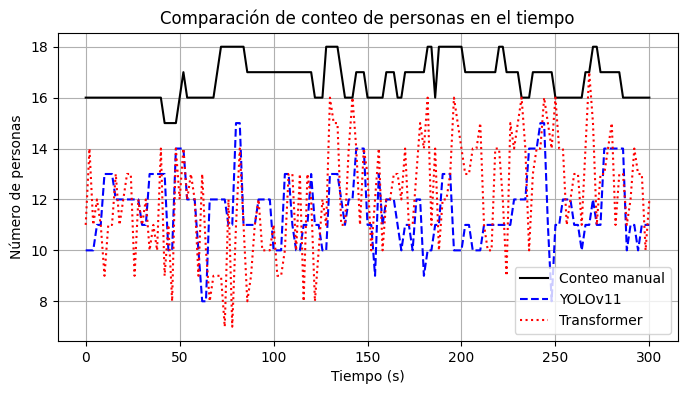

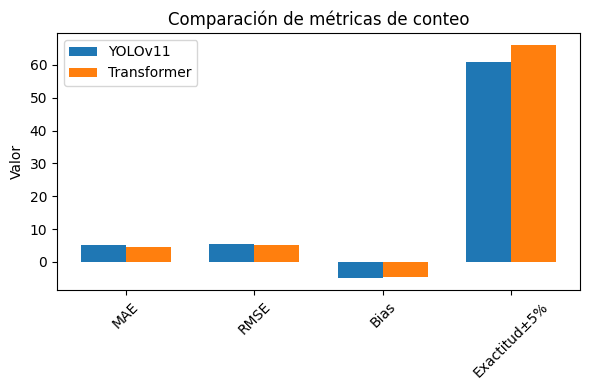

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Usa la columna de tiempo real de tu archivo. 
# Si tienes 'tiempo_seg' y/o 'tiempo_mmss', escoge la que quieras.
tiempo = df.loc[mask, 'tiempo_seg']  # o 'tiempo_mmss' si prefieres

# 1) Serie temporal de conteos
plt.figure(figsize=(8, 4))
plt.plot(tiempo, manual, label='Conteo manual', color='black')
plt.plot(tiempo, yolo_pred, label='YOLOv11', color='blue', linestyle='--')
plt.plot(tiempo, detr_pred, label='Transformer', color='red', linestyle=':')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de personas')
plt.title('Comparación de conteo de personas en el tiempo')
plt.legend()
plt.grid(True)
plt.show()

# 2) Barras con métricas
metrics = ['MAE', 'RMSE', 'Bias', 'Exactitud±5%']
yolo_vals = [mae_yolo, rmse_yolo, bias_yolo, acc_tol5_yolo]
detr_vals = [mae_detr, rmse_detr, bias_detr, acc_tol5_detr]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, yolo_vals, width, label='YOLOv11')
plt.bar(x + width/2, detr_vals, width, label='Transformer')
plt.xticks(x, metrics, rotation=45)
plt.ylabel('Valor')
plt.title('Comparación de métricas de conteo')
plt.legend()
plt.tight_layout()
plt.show()



## 4.2 Interpretación de resultados y recomendaciones

El análisis de las métricas y las gráficas permite extraer conclusiones útiles para el restaurante:

- Precisión del conteo: Un MAE bajo y una exactitud alta (dentro de ±5 personas) indican que el modelo estima adecuadamente el flujo de clientes. Por ejemplo, si YOLOv11 presenta MAE=2 y Exactitud±5=90%, significa que suele errar en promedio en 2 personas y el 90% de las predicciones están a máximo 5 personas del conteo real. Un sesgo cercano a 0 sugiere ausencia de tendencia sistemática a sobrecontar o subcontar (como explica Google, el sesgo de predicción es la diferencia entre las medias del modelo y la realidad

- Comparación de modelos: Al comparar YOLOv11 y Transformer, observamos cuál tiene menor error. Si YOLOv11 muestra menor RMSE y MAE, se podría priorizar su uso para este caso específico. Sin embargo, el modelo Transformer podría detectar mejor personas en casos de oclusión o baja iluminación, a pesar de ser más lento.

- Impacto en el negocio: Con un conteo fiable de clientes, Alitas Factory puede optimizar la asignación de personal: por ejemplo, abrir más cajas cuando se esperan picos de afluencia, o programar promociones en horarios de baja ocupación. La visualización de la ocupación en tiempo real facilita la toma de decisiones inmediatas. Estudios coinciden en que conocer patrones de flujo de clientes (mediante conteo o mapas de calor) es clave para mejorar la experiencia del cliente y aumentar ventas

- Recomendaciones específicas: Se sugiere implementar este sistema piloto en una pantalla o dashboard para que los administradores vean el conteo en vivo. Además, se podrían cruzar estos datos con el punto de venta (POS) para analizar, por ejemplo, la tasa de conversión clientes/personas que compran. Otra recomendación es recalibrar o reentrenar periódicamente los modelos con nuevos datos locales (adaptación al entorno del restaurante, ángulos específicos de cámara, etc.), lo cual mejora la precisión según la literatura.

## 4.3 Limitaciones y trabajos futuros

Algunas limitaciones del estudio actual son: 

(a) se trabajó con un único punto de vista de cámara. Clientes ocultos detrás de otros, mobiliario o zonas fuera de la vista no se contarán. 

(b) Los modelos pre-entrenados pueden no estar perfectamente adaptados al entorno particular (iluminación, decoración) de Alitas Factory. 

(c) El análisis se basó en un segmento breve de video; sería ideal validar con más datos de diferentes días y horarios. 

(d) No se consideraron factores demográficos (edad, género) ni comportamientos adicionales (tiempo de permanencia), aunque los modelos modernos podrían ampliarse para ello.

Trabajos futuros: Para mejorar, se recomienda recolectar más datos de video en distintos turnos y entrenar modelos específicos. También se podría explorar técnicas de seguimiento múltiple (multi-object tracking) que cuenten a personas recurrentes sin doble conteo. Otra línea es integrar cámaras adicionales en diferentes ángulos para cubrir todo el local. Finalmente, aplicar analítica avanzada, como mapas de calor de movimiento o segmentación de instancias, podría brindar información extra (por ejemplo, áreas más visitadas del local) que complemente al conteo de personas.

En resumen, este prototipo demuestra el potencial de la visión artificial en restaurantes: con modelos SOTA como YOLOv11 y DETR se obtiene un conteo automático de clientes comparable al manual. Estos datos pueden transformar la operación de Alitas Factory, permitiendo decisiones basadas en métricas objetivas de afluencia de clientes. La evidencia respalda que invertir en inteligencia de video produce beneficios medibles en eficiencia y satisfacción del cliente.